In [93]:
import pandas as pd
import numpy as np
df = pd.read_csv("Google_Stock_Price_Train.csv")

In [94]:
# df.head()
# data = df['Close']
df['Close'] = df['Close'].str.replace(",", "")
df['Close'] = df['Close'].astype(float)
data = df['Close'].values.reshape(-1, 1)
data

array([[ 663.59    ],
       [ 666.45    ],
       [ 657.21    ],
       ...,
       [1049.369995],
       [1048.140015],
       [1046.400024]])

In [95]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
data = sc.fit_transform(data)
train = data[: int(len(data)*0.8)]
test = data [ int(len(data)*0.8) : ]

In [96]:
# train = sc.fit_transform(train)
# test = sc.fit_transform(test)

In [97]:
def seq(arr, step=3):
    x=[]
    y=[]
    for i in range(len(arr)-step):
        x.append(arr[i:i+step, 0])
        y.append(arr[i+step, 0])
    return np.array(x), np.array(y)

In [98]:
xtrain, ytrain = seq(train, 3)
xtest, ytest = seq(train, 3)

In [99]:
# xtrain  --> to print xtrain
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM
m = Sequential()
m.add(LSTM(units = 25, return_sequences=True, input_shape= (xtrain.shape[1], 1)))
m.add(LSTM(units = 25))
m.add(Dense(units = 1))
m.compile(optimizer='Adam', loss='mean_squared_error')
m.fit(xtrain, ytrain, batch_size = 3, epochs = 30)

Epoch 1/30


C:\Users\buoyn\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


402/402 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0345
Epoch 2/30
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0016
Epoch 3/30
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0019
Epoch 4/30
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0018
Epoch 5/30
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0010   
Epoch 6/30
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0012
Epoch 7/30
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.1253e-04
Epoch 8/30
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0019
Epoch 9/30
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.3485e-04
Epoch 10/30
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0016
Epoch 11/30
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0023
Epoch 12/30
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0012
Epoch 13/30
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.0323e-04
Epoch 14/30
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.9627e-04
Epoch 15/30
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/s

In [100]:
ypred = m.predict(xtest)

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [101]:
# ypred = sc.inverse_transform(ypred)
ypred = sc.inverse_transform(ypred)

In [104]:
ytest = sc.inverse_transform(ytest.reshape(-1,1))

In [105]:
ytest

array([[648.24],
       [620.76],
       [621.43],
       ...,
       [778.53],
       [779.96],
       [795.26]])

In [106]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(ypred, ytest)
mae

8.63156488767098

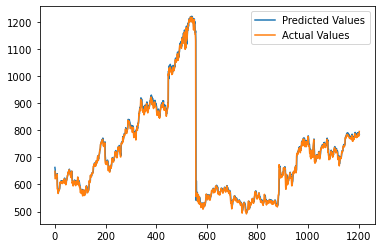

In [109]:
import matplotlib.pyplot as plt
plt.plot(ypred, label='Predicted Values')
plt.plot(ytest, label='Actual Values')
plt.legend()
# plt.